**1. Gather and prepare data: Gather and prepare the data you will use to train the model. This may involve collecting data from various sources,
do EDA, cleaning and formatting the data, feature selection, encoding, and splitting it into training, validation, and testing sets.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**# Data Collection**

In [ ]:
df = pd.read_csv("Campaign_data_statistics_section_1.csv")
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


**# EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [ ]:
# Check null values
df.isna().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [ ]:
df.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

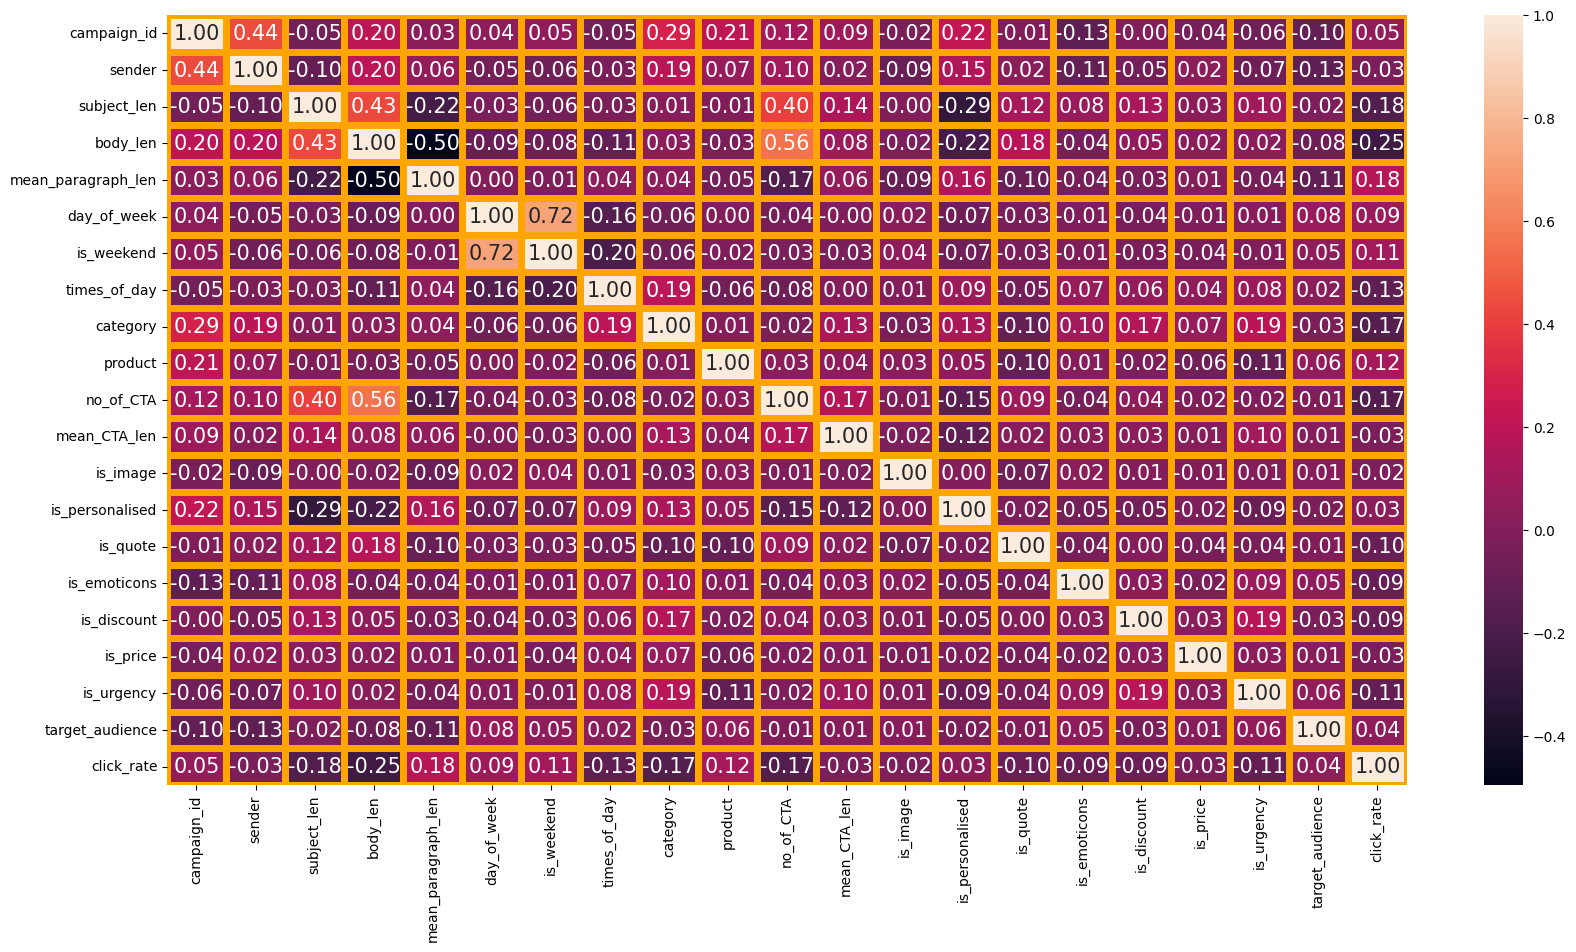

In [ ]:
# campaign_id column is not so important we can drop it
# df.drop(['campaign_id'], axis=1, inplace=True)

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

In [ ]:
# from above we can say that is_timer column contains only zero value
# it is not so important we can drop it
df.drop(['is_timer'], axis=1, inplace=True)

In [ ]:
df['times_of_day'].unique()

array(['Noon', 'Morning', 'Evening'], dtype=object)

In [ ]:
# Encode times_of_day column

df['times_of_day'].replace({"Noon":0,"Morning":1,"Evening":2}, inplace=True)

In [ ]:
# Feature selection by linear regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

x = df.drop("click_rate",axis=1)
y = df['click_rate']

# linear regression
feature_select = SelectFromModel(LinearRegression())
feature_select.fit(x,y)
feature_0 = feature_select.get_feature_names_out()
print(f"Important features are: {feature_0}")

Important features are: ['is_weekend' 'times_of_day' 'is_personalised' 'is_quote' 'is_emoticons'
 'is_discount' 'is_urgency']


In [ ]:
# Feature selection by RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# linear regression
feature_select = SelectFromModel(RandomForestRegressor())
feature_select.fit(x,y)
feature_1 = feature_select.get_feature_names_out()
print(f"Important features are: {feature_1}")

Important features are: ['campaign_id' 'subject_len' 'body_len' 'mean_paragraph_len' 'no_of_CTA'
 'mean_CTA_len']


In [ ]:
# Feature selection by DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

# linear regression
feature_select = SelectFromModel(DecisionTreeRegressor())
feature_select.fit(x,y)
feature_2 = feature_select.get_feature_names_out()
print(f"Important features are: {feature_2}")


Important features are: ['campaign_id' 'subject_len' 'body_len' 'mean_paragraph_len' 'no_of_CTA'
 'mean_CTA_len']


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

**2.Check distribution of the data, outliers and missing value treatment.**

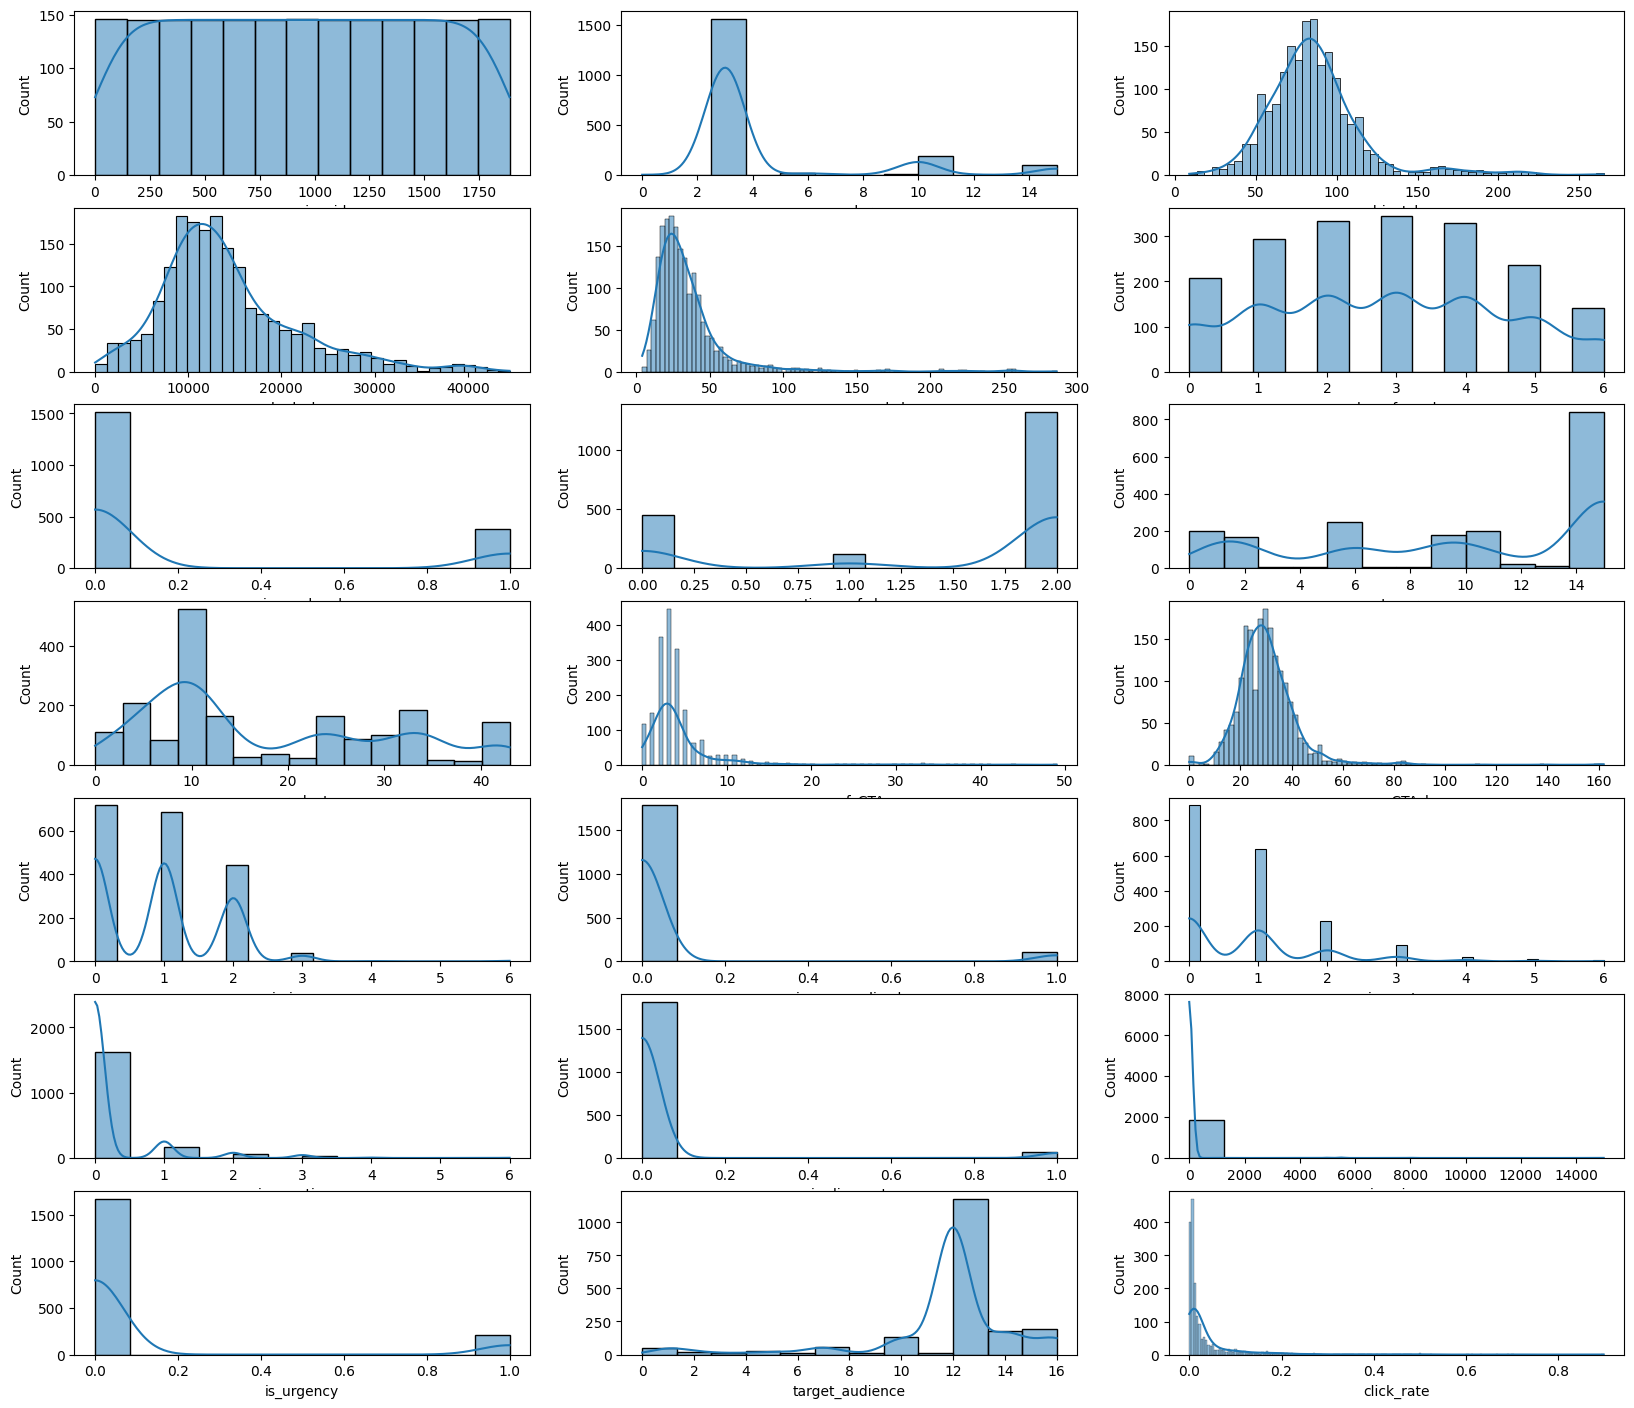

In [ ]:
# Distribution of data
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plot_num = 1
for i in df.columns:
    plt.subplot(8,3,plot_num)
    sns.histplot(df[i],kde=True)
    plot_num+=1
plt.show()

From above graph distribution we can say that data is not normaly distributed

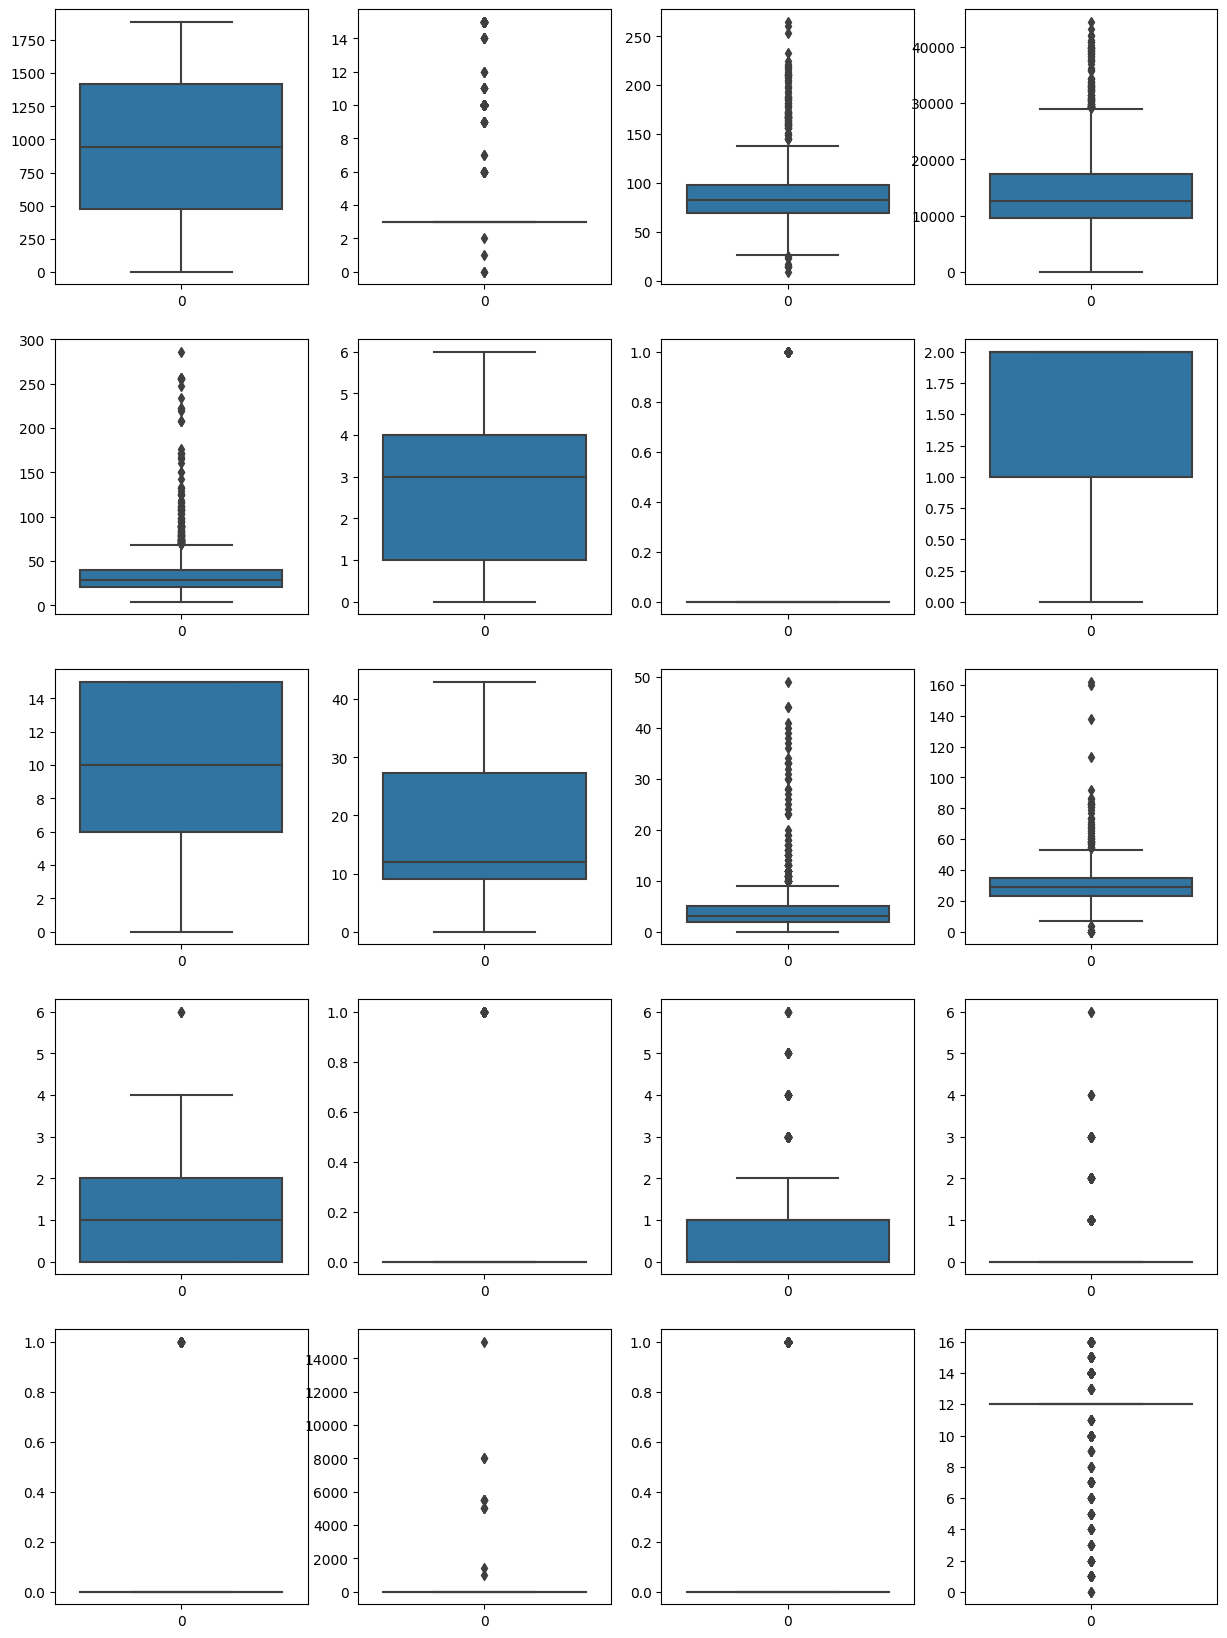

In [ ]:
int_column_list = x.select_dtypes(include= [int,float]).columns
# len(int_column_list)
plt.figure(figsize=(15,25))
x=1
for i in int_column_list:
    plt.subplot(6,4,x)
    sns.boxplot(df[i])
    x+=1
plt.show()

**3. Choose a model: Use Random Forest Algorithm.**

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

normal_scaler = MinMaxScaler()
normal_scaler.fit(x_train)

train_array = normal_scaler.transform(x_train)
test_array = normal_scaler.transform(x_test)

model = RandomForestRegressor()

**4.	Train the model: You'll need to train it using the data you collected and prepared in step 2. This involves feeding the data into the model and adjusting the model's parameters until it produces accurate results.**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model.fit(train_array, y_train)
y_pred_train = model.predict(train_array)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 0.0004858729618854546
RMSE: 0.022042526213786263
MAE : 0.01122974676765235
R-Squared : 0.9372705444091436


**5.	Evaluate the model: After training the model, you'll need to evaluate its performance using the validation and testing sets. This will help you determine how well the model is able to generalize to new data and whether it is overfitting or underfitting.**

In [ ]:
#Testing data accuracy
y_pred_test = model.predict(test_array)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred_test)
print("R-Squared :",r2_value)

MSE : 0.0023686951556231746
RMSE: 0.048669242398286565
MAE : 0.027945660683540294
R-Squared : 0.46469613565238443


from above results we can say that our model meets to overfitting

**6.	Fine-tune the model: Based on the results of the evaluation, you may need to fine-tune the model by adjusting the model's parameters, selecting different features, or using a different model architecture.**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomForestRegressor

# Define the parameter grid to search
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize a random forest regressor
model = RandomForestRegressor()

# Initialize GridSearchCV to search the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV to the data
grid_search.fit(train_array, y_train)

# Print the best hyperparameters
# print("Best hyperparameters: ", grid_search.best_params_)

ImportError: cannot import name 'RandomForestRegressor' from 'sklearn.model_selection' (C:\Users\CHINMAYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\__init__.py)

In [ ]:
grid_search.best_params_

In [ ]:
# Training Performance
model_1 = grid_search.best_estimator_

model_1.fit(train_array, y_train)
y_pred_train = model_1.predict(train_array)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

In [ ]:
# Testing Performance
model_1 = grid_search.best_estimator_

y_pred_test = model_1.predict(test_array)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred_test)
print("R-Squared :",r2_value)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid to search
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'n_jobs': [-1, 1, 2],
              'ccp_alpha': [0.0, 0.1, 0.01]}

# Initialize a random forest regressor
model = RandomForestRegressor()

# Initialize GridSearchCV to search the best hyperparameters
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=5)

# Fit the GridSearchCV to the data
random_search.fit(x_train, y_train)
random_search.best_params_


In [ ]:
# Training Performance
model_2 = random_search.best_estimator_

model_2.fit(train_array, y_train)
y_pred_train = model_2.predict(train_array)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

In [ ]:
# Testing Performance

y_pred_test = model_2.predict(test_array)

mse = mean_squared_error(y_test,y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred_test)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred_test)
print("R-Squared :",r2_value)